# imported modules


In [1]:
#import functions 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as ss

%matplotlib inline 

# How to read datatframe

In [2]:
df = pd.read_csv('income_dataset.csv')

df['total'] = df['income'] +df['capital-gain']-df['capital-loss']
#print(df.columns)
this_max=max(df.age)                    
print(df[df.age==this_max]) #1     

      age         workclass     education  educational-num  \
567    90           Private          10th                6   
858    90               NaN       1st-4th                2   
1653   90           Private       HS-grad                9   
2517   90           Private  Some-college               10   
3213   90           Private    Assoc-acdm               12   
4346   90           Private       Masters               14   
4690   90               NaN       HS-grad                9   
5040   90           Private     Bachelors               13   
5099   90           Private       HS-grad                9   
5273   90           Private   Prof-school               15   
6197   90  Self-emp-not-inc     Bachelors               13   
6311   90           Private       HS-grad                9   
7041   90       Federal-gov       HS-grad                9   
7408   90           Private       HS-grad                9   
7829   90           Private       HS-grad                9   

       

# How to create histogram 

Number of bins: 20


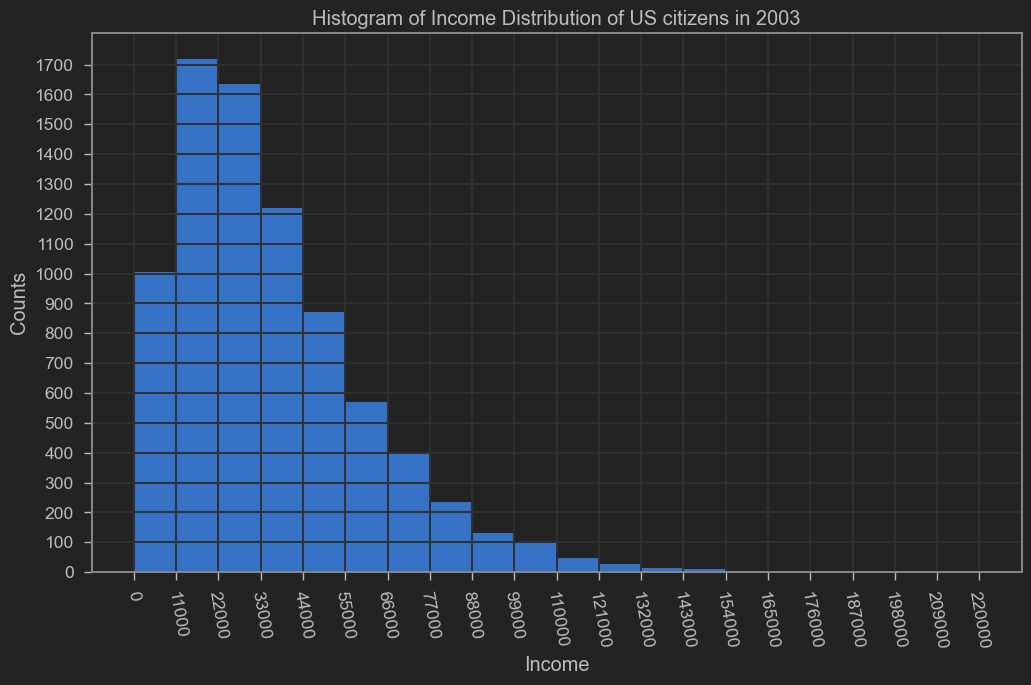

In [3]:
# number of bins
num = 20
print(f'Number of bins: {num}')

#Plot the figure
plt.figure(figsize=(12, 7))

# Create a list of numbers from 0 to 220000 with equal spacing to create num bins. This list is used to create the bins and x ticks
X = np.linspace(0, 220000, num+1)
plt.hist(df['income'], bins=X)
plt.xticks(X, rotation=280)

# Create a list of numbers from 0 to 1700 with 100 spacing. This list is used to create the y ticks
Y = np.arange(0, 1800, 100)
plt.yticks(Y)

#Remove '#' on the next line to see y axis in logarithmic scale 
#plt.yscale('log')

# Create x and y labels, create title and show the plot with a grid
plt.ylabel('Counts')
plt.xlabel('Income')
plt.title('Histogram of Income Distribution of US citizens in 2003')
plt.grid()
plt.show()

# How to make a boxplot

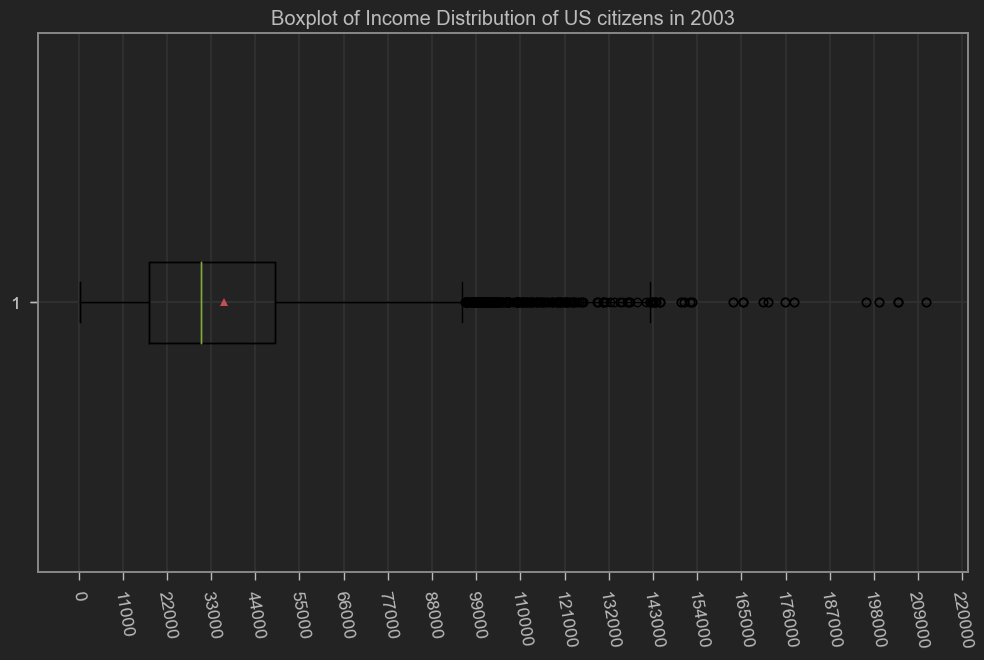

In [4]:
#Create a horizontal boxplot and show the mean
plt.figure(figsize=(12, 7))
Vertical = False

plt.boxplot(df['income'], vert=Vertical, whis=1.5, showmeans=True)
plt.boxplot(df['income'], vert=Vertical, whis=3)

#Plot title and x-ticks and show the plot with a grid
plt.title('Boxplot of Income Distribution of US citizens in 2003')
X = np.arange(0, 220000+1, 11000)
plt.xticks(X, rotation=280)
plt.grid()
plt.show()

# How to make a violinplot

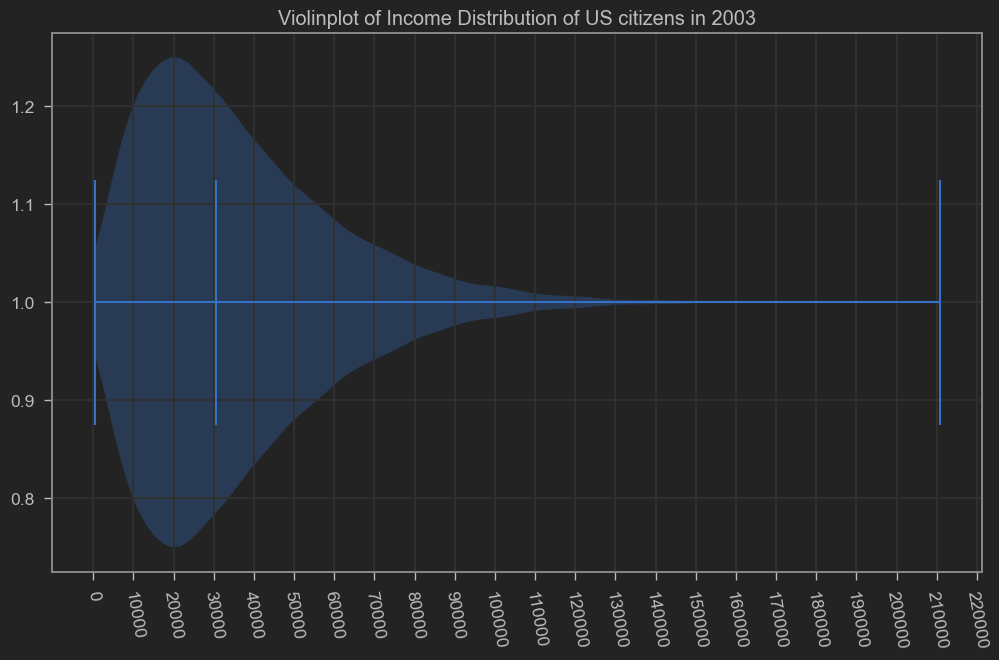

In [5]:
#Create violinplot
plt.figure(figsize=(12, 7))
plt.violinplot(df['income'], vert=False, showmedians=True)

#Plot title and x-ticks and show the plot with a grid
X = np.arange(0, 220000+1, 10000)
plt.xticks(X, rotation=280)
plt.grid()
plt.title('Violinplot of Income Distribution of US citizens in 2003')
plt.show()

# How to make multiple plots

Name: age, Num of bins: 10
Name: educational-num, Num of bins: 10
Name: income, Num of bins: 25
Name: month_of_birth, Num of bins: 13
Name: hours-per-week, Num of bins: 11
Name: total, Num of bins: 27


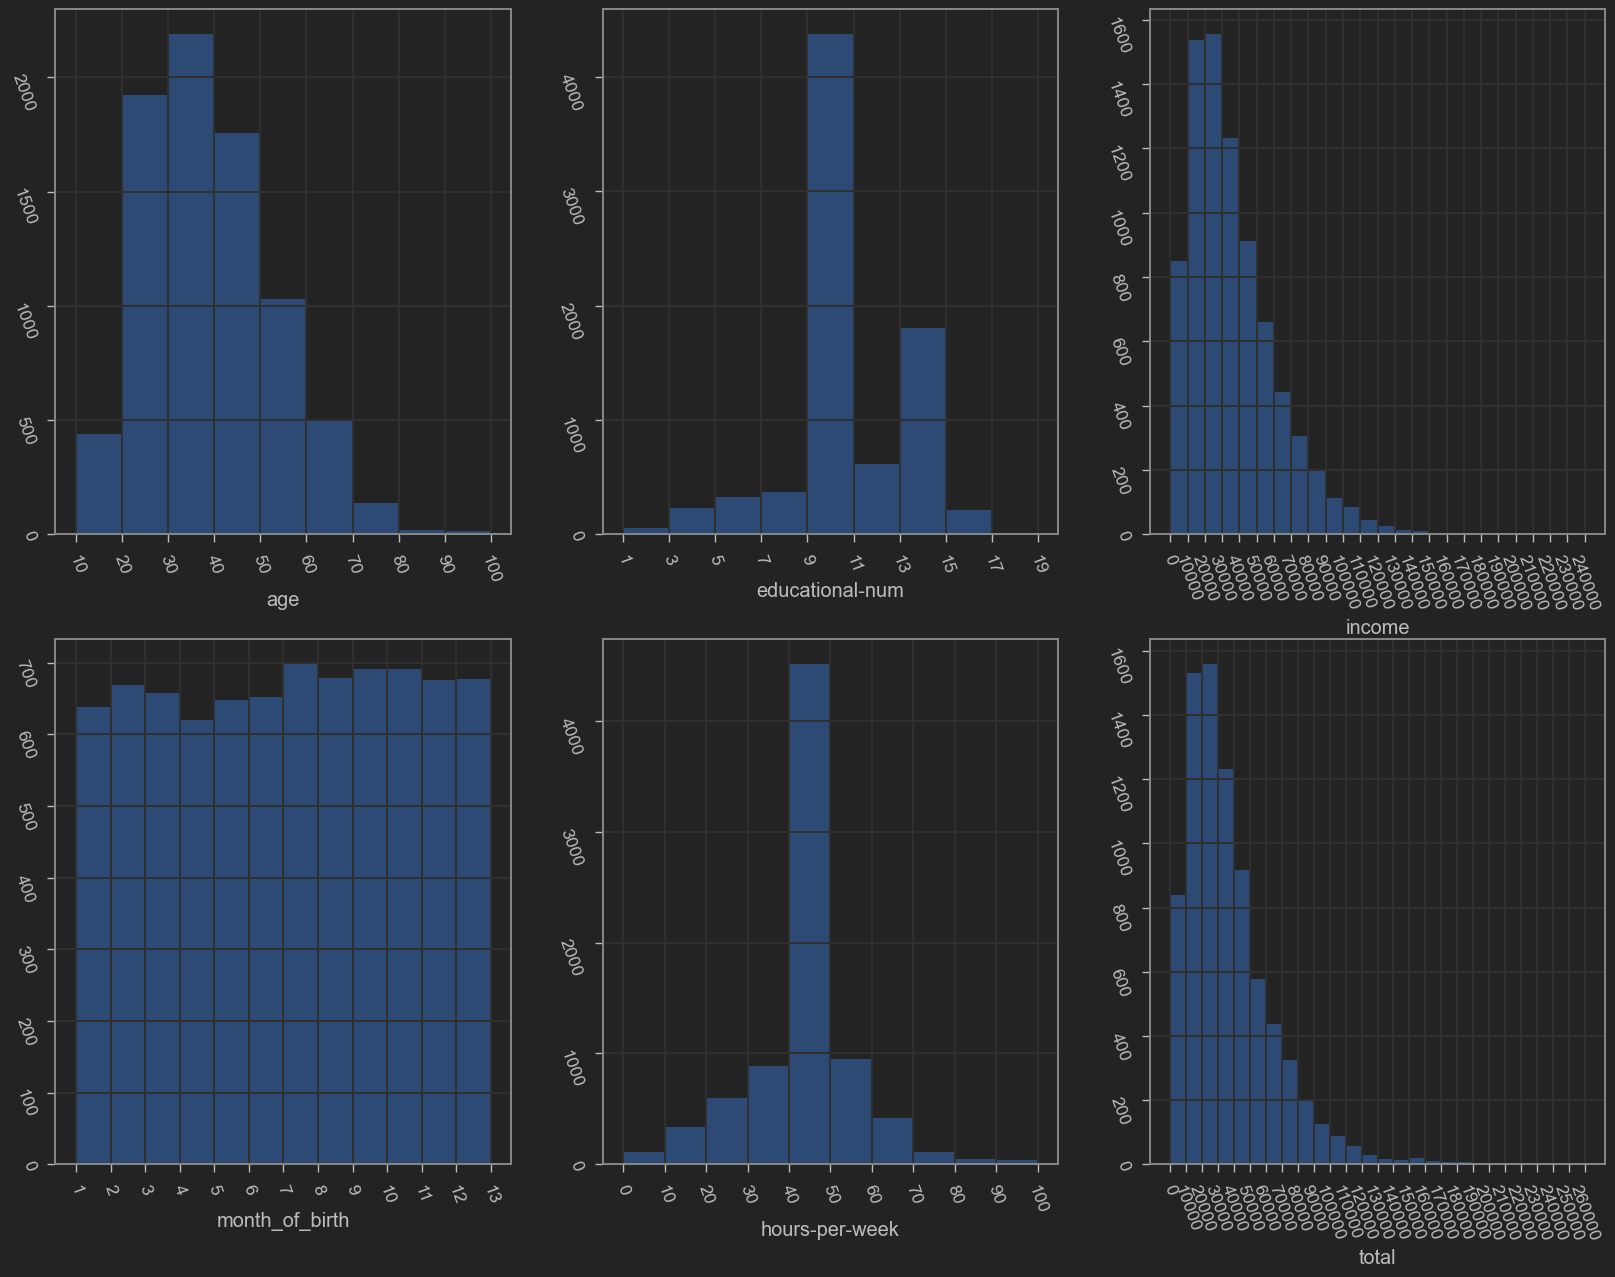

In [6]:
#Create a grid of graphs 
#Select number of rows and columns
rows = 2
cols = 3

#Create grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

#Create histogram names and bins [start, stop, spacing]
Hist_names = ['age', 'educational-num', 'income',
              'month_of_birth', 'hours-per-week', 'total']

bins = [[10, 101, 10], [1, 20, 2], [0, 240001, 10000], [1, 14, 1], [0, 101, 10], [0, 260001, 10000]]


#Plot each histogram on each subplot 
n = 0

for i in range(rows):
    for u in range(cols):
        
        #Get the corresponding data
        ax = axes[i][u]
        name = Hist_names[n]
        data = df[name]
        Bin = bins[n]
        
        #Plot the histogram
        X = np.arange(Bin[0], Bin[1], Bin[2])
        print(f'Name: {name}, Num of bins: {len(X)}')
        ax.hist(data, bins=X, alpha = 0.5)
        ax.set_xticks(X)
        ax.tick_params(rotation=290)
        ax.set_xlabel(name)
        ax.grid(True)
        
        #Enable log scale by removing hastag on line below
        #ax.set_yscale('log')
        n += 1
        
plt.show()

# How to use crosstab 

In [1]:
#Create a cross table 
table = pd.crosstab(df["gender"], df["workclass"], margins = False)
table

NameError: name 'pd' is not defined

# Special boxplots

Text(0, 0.5, 'Frequency')

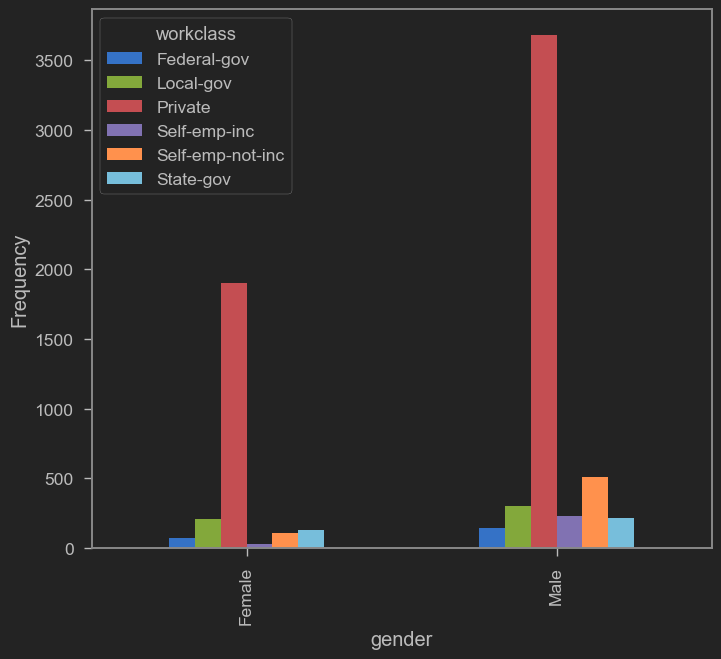

In [8]:
#bar plot grouped by gender 
table.plot.bar()
plt.ylabel("Frequency")

# Stacked Boxplots

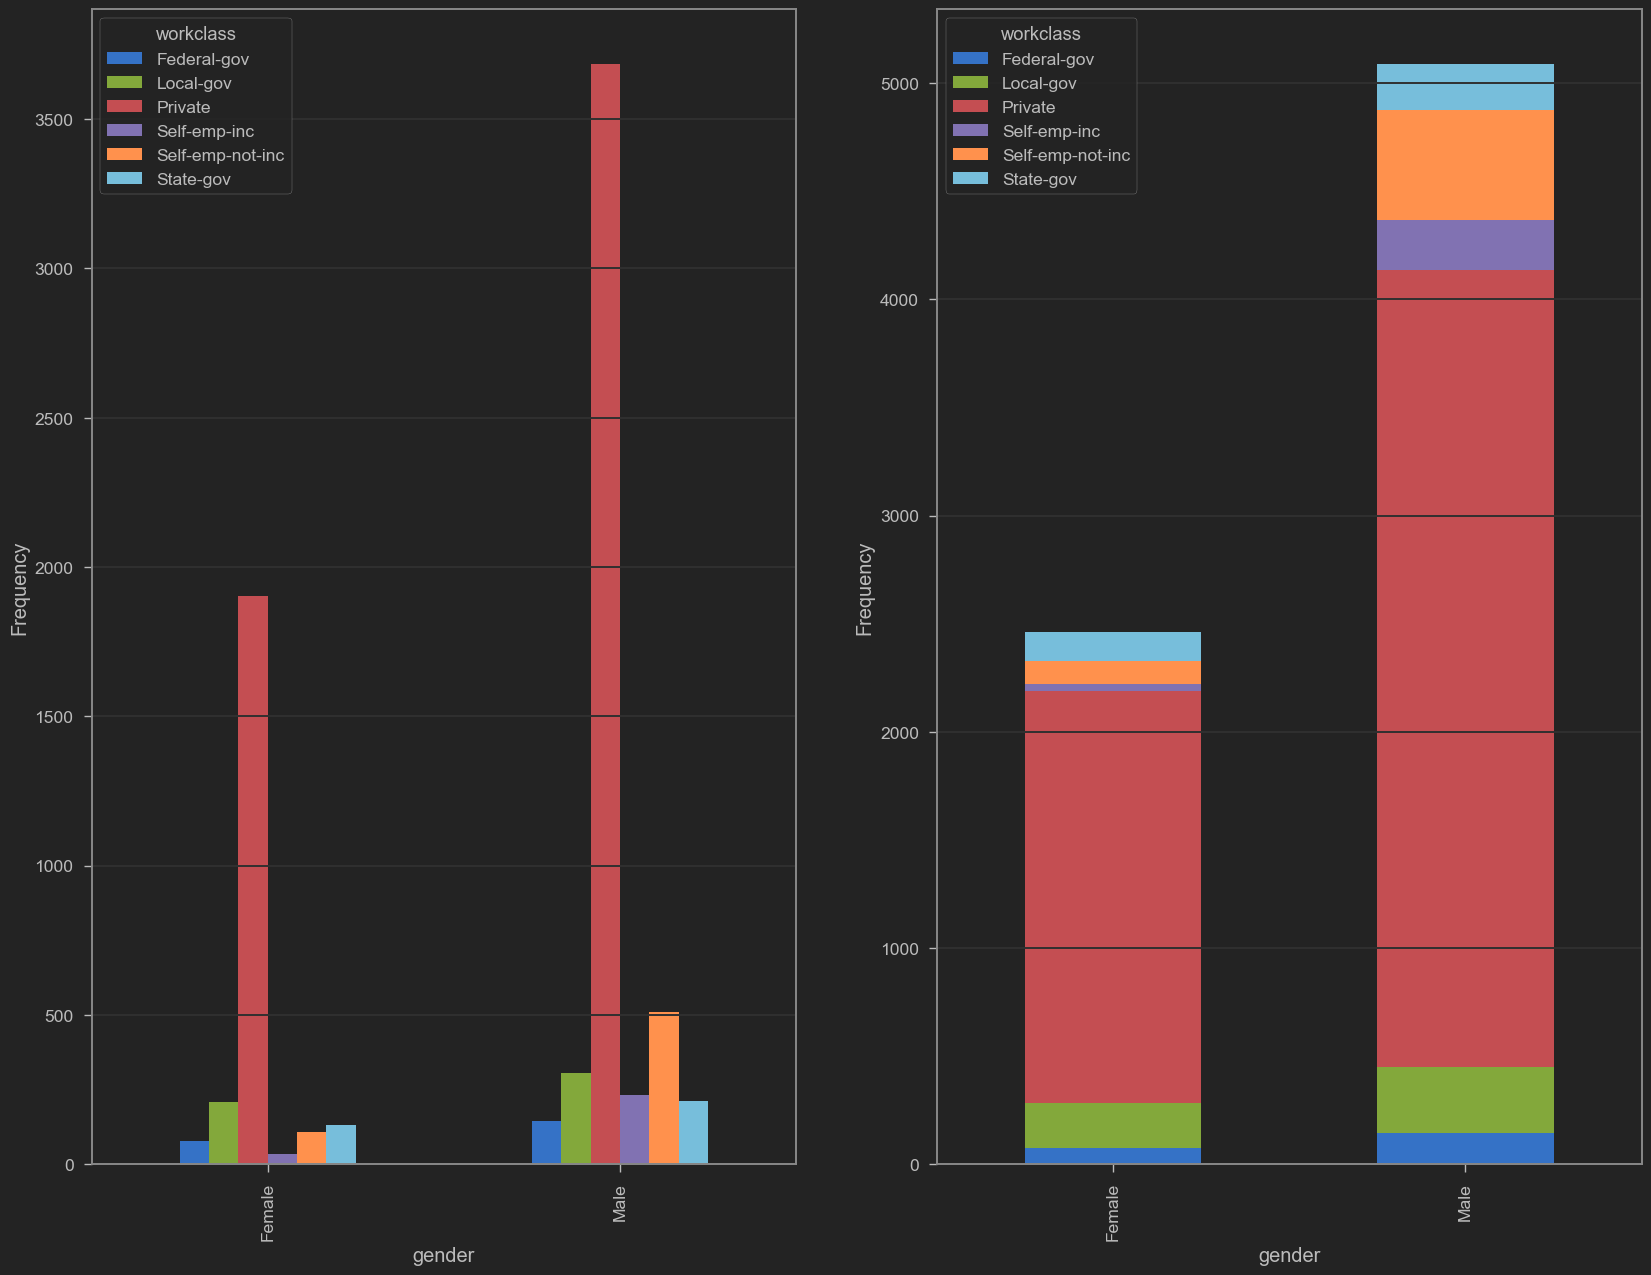

In [9]:
#Plot the workclass counts by gender as a grouped bar chart (as in Question 2) in one subplot, 
#and as a stacked barchart the other subplot.

fig, axes = plt.subplots(ncols=2, figsize = (20, 15))
df.groupby(["gender", "workclass"]).size().unstack().plot(kind="bar", ax=axes[0])
axes[0].set_ylabel("Frequency")
df.groupby(["gender", "workclass"]).size().unstack().plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_ylabel("Frequency")
axes[0].grid(True, axis = 'y')
axes[1].grid(True, axis = 'y')

# More crosstabs and stacked boxplots

workclass  Federal-gov  Local-gov   Private  Self-emp-inc  Self-emp-not-inc  \
gender                                                                        
Female        0.030894   0.084959  0.773577      0.013415          0.043902   
Male          0.028498   0.059945  0.724057      0.045794          0.099843   
All           0.029279   0.068098  0.740196      0.035241          0.081611   

workclass  State-gov  All  
gender                     
Female      0.053252    1  
Male        0.041863    1  
All         0.045575    1

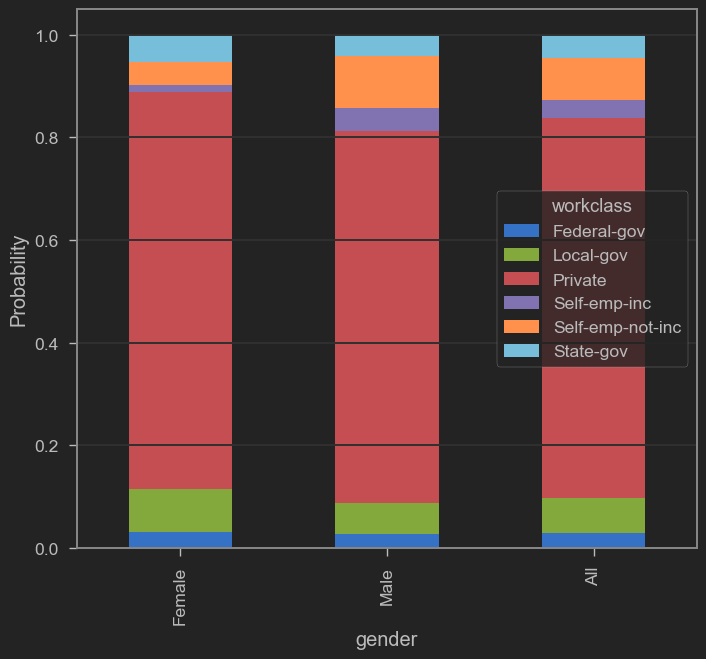

In [10]:
"""
 a table of gender (rows) and workclass (columns), normalized by the row-marginal counts of males and females , 
 such that you have *conditional probabilities of workclass, given the gender* . 
 Print the table and make a stacked barplot of these conditional probabilities. 

"""

cond_table = pd.crosstab(df["gender"], df["workclass"], margins = True)
for i in range (len(cond_table.index)):
    cond_table.iloc[i] = cond_table.iloc[i] / cond_table['All'][i]
    
display(cond_table)

cond_table.plot.bar(stacked=True, y = ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'])
plt.ylabel('Probability')

plt.grid(True, axis = 'y')

# More crosstabs and table distribution

gender              Female      Male  All
workclass                                
Federal-gov       0.343891  0.656109    1
Local-gov         0.406615  0.593385    1
Private           0.340612  0.659388    1
Self-emp-inc      0.124060  0.875940    1
Self-emp-not-inc  0.175325  0.824675    1
State-gov         0.380814  0.619186    1
All               0.325914  0.674086    1

Text(0, 0.5, 'Probability')

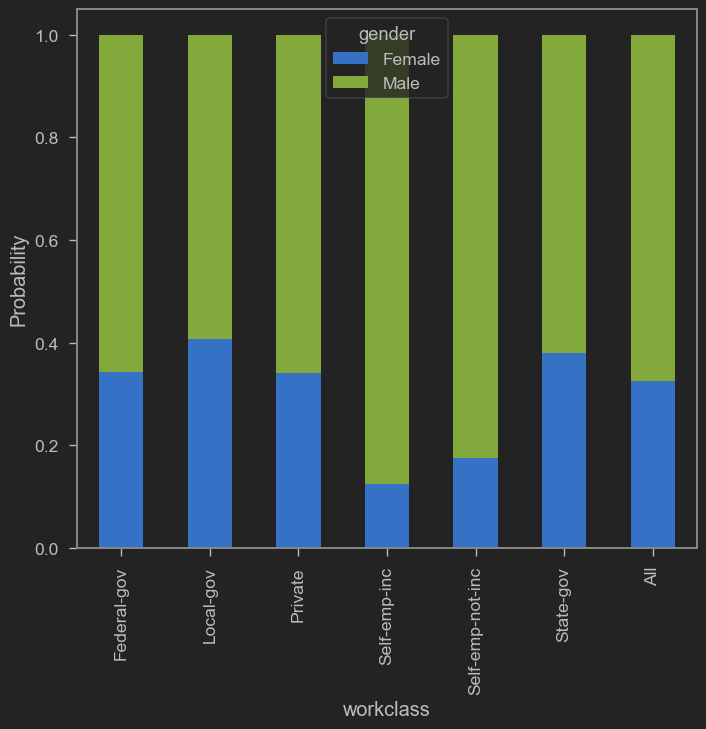

In [11]:
"""
a table of workclass (rows) and gender (columns), with the *conditional probabilities of the gender, given the workclass*.  
Print the table and show the conditional probabilities as a stacked barplot for each workclass.
"""

cond_table1 = pd.crosstab(df["workclass"], df["gender"], margins = True)

for i in range (len(cond_table1.index)):
    cond_table1.iloc[i] = cond_table1.iloc[i] / cond_table1['All'][i]
display(cond_table1)

cond_table1.plot.bar(stacked=True, y = ['Female', 'Male'])
plt.ylabel('Probability')

In [12]:
mean_income = df['income'].groupby(df['gender']).mean()
workclass = df.groupby(['workclass'])
mean_workclass = df['income'].groupby(df['workclass']).mean()
mean_workclass

workclass
Federal-gov         45349.361991
Local-gov           38897.745136
Private             34924.670664
Self-emp-inc        49726.165414
Self-emp-not-inc    39795.902597
State-gov           38128.581395
Name: income, dtype: float64

# Seaborn historgrams 

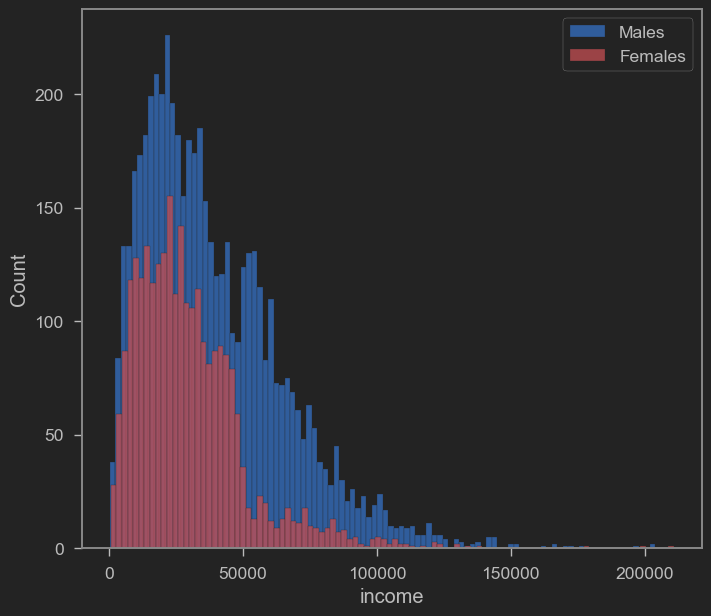

In [13]:
group = df['income'].groupby(df['gender'])
males = group.get_group('Male')
females = group.get_group('Female')

sns.histplot(label = 'Males', x = males, bins = 100, color = 'b')
sns.histplot(label = 'Females', x = females, bins = 100, color = 'r')

plt.legend()
plt.show()

# Seaborn boxplots

<AxesSubplot: xlabel='gender', ylabel='income'>

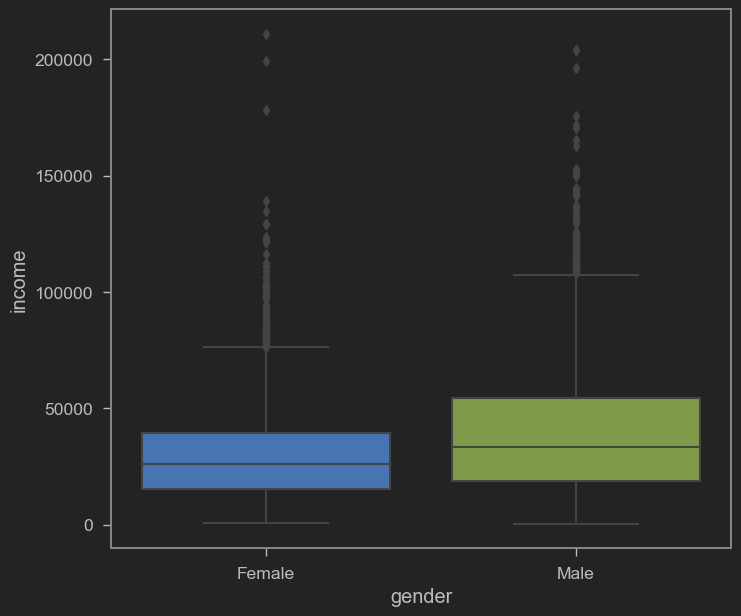

In [14]:
sns.boxplot(data = df, x= "gender", y = "income")

# Seaborn violinplots

<AxesSubplot: xlabel='gender', ylabel='income'>

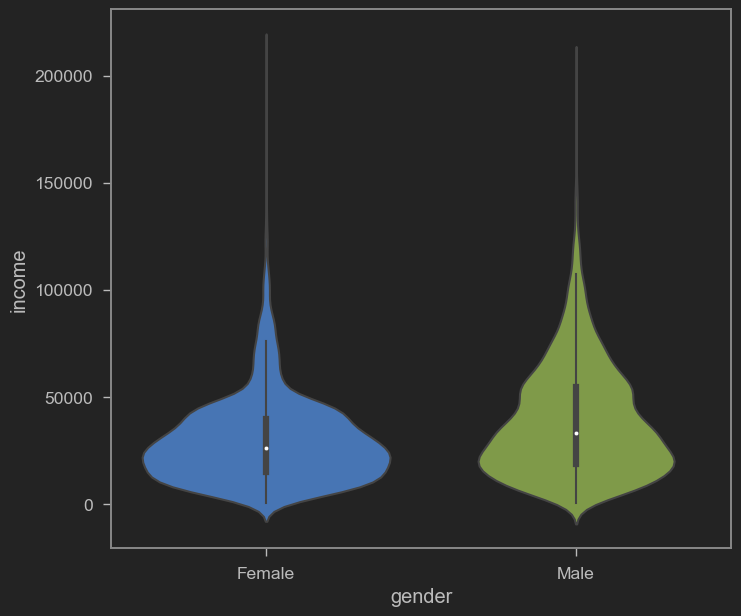

In [15]:
sns.violinplot(data = df, x = "gender", y = "income")

# More Seaborn boxplots

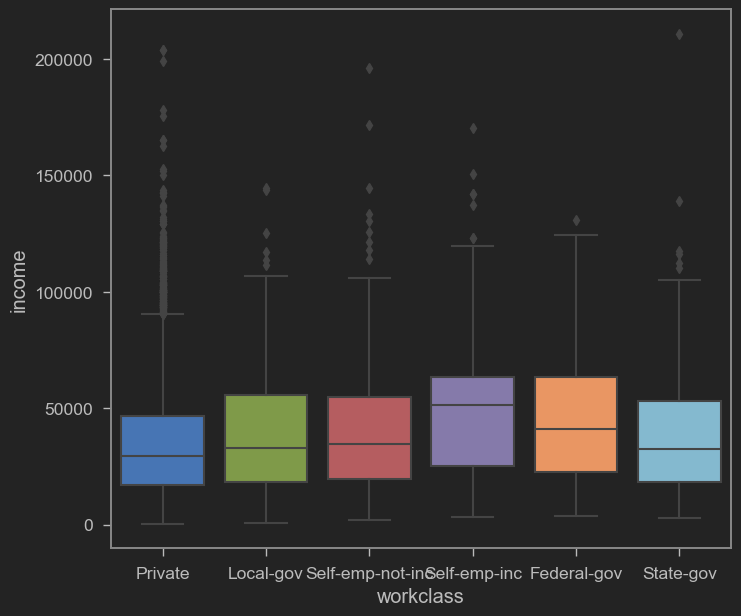

In [16]:
sns.boxplot(data = df, x = "workclass", y = "income", orient='v')
sns.set(rc={"figure.figsize":(10, 8)})


# More Seaborn violinplots

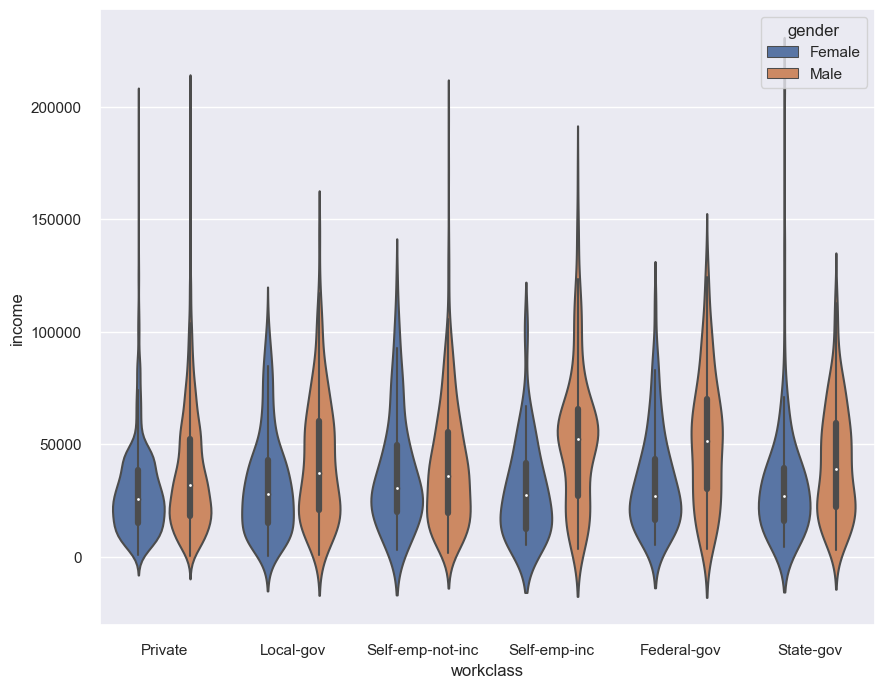

In [17]:
sns.violinplot(data = df, x = "workclass", y = 'income', hue = 'gender')
sns.set(rc={"figure.figsize":(15, 8)})

# Bootstrap and CI functions 

In [18]:

#Mean function to return the mean of every column in numpy 2d array
def mean(arr):

    return np.mean(arr, axis=0)

#Bootstrap function 
def bootstrap(data, N, fcn, numIter=1000):
    
    arr = np.array([])
    #Create a new random sample with replacement of size N and record it's statistic 
    for i in range(numIter):
        
        Sample = data.iloc[np.random.randint(0, len(df), size=N)]

        point = fcn(np.array(Sample))
        arr = np.append(arr, [point])

    return arr.reshape(numIter, -1)

#Confidence interval function
def confidenceInt(data, prec):
    
    # 0 < prec < 100
    prec = (100-prec)/2

    #Get the bottom data point of percentile (prec)
    lower = np.percentile(Data, prec)
    
    #Get the top data point of percentile (100 - prec)
    upper = np.percentile(Data, 100-prec)
    
    return [lower, upper]

In [19]:
df = pd.read_csv('movieDataset.csv')

# conditional  table using groupby

dirGender  female  male
genre                  
action          9    48
adventure       6    58
comedy         13    35
drama           5    31
other           4    41

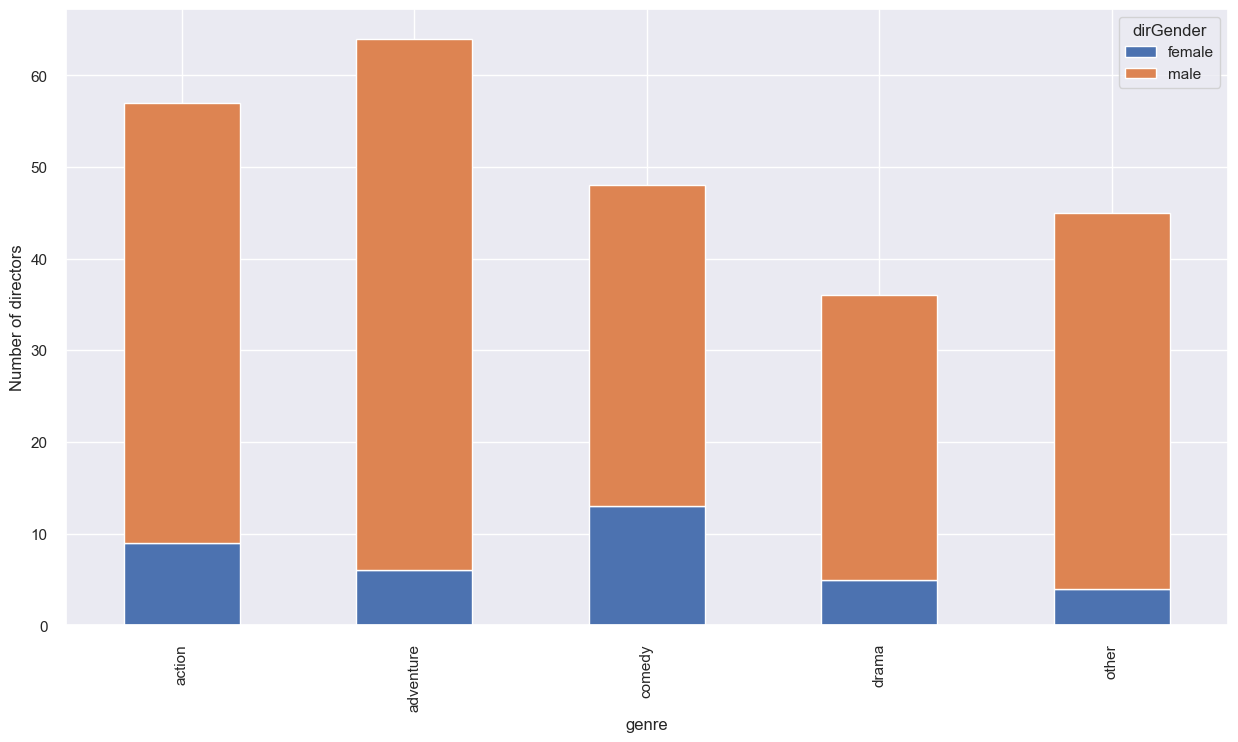

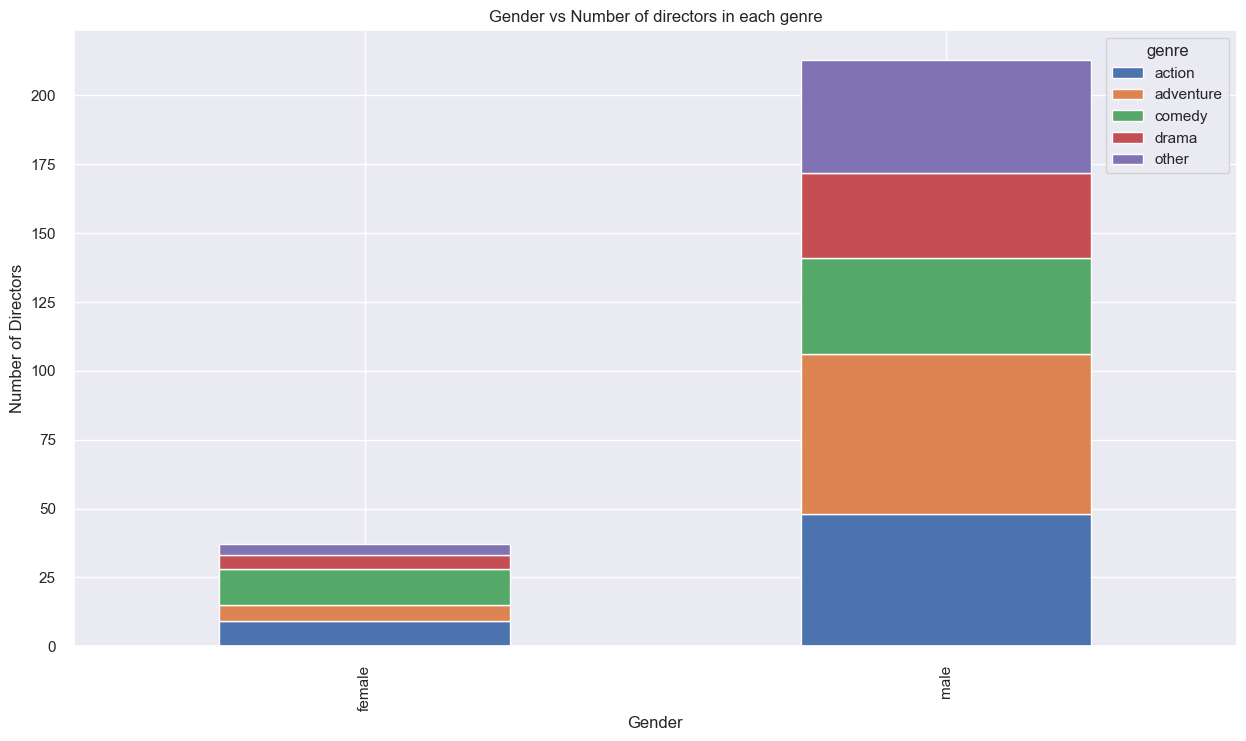

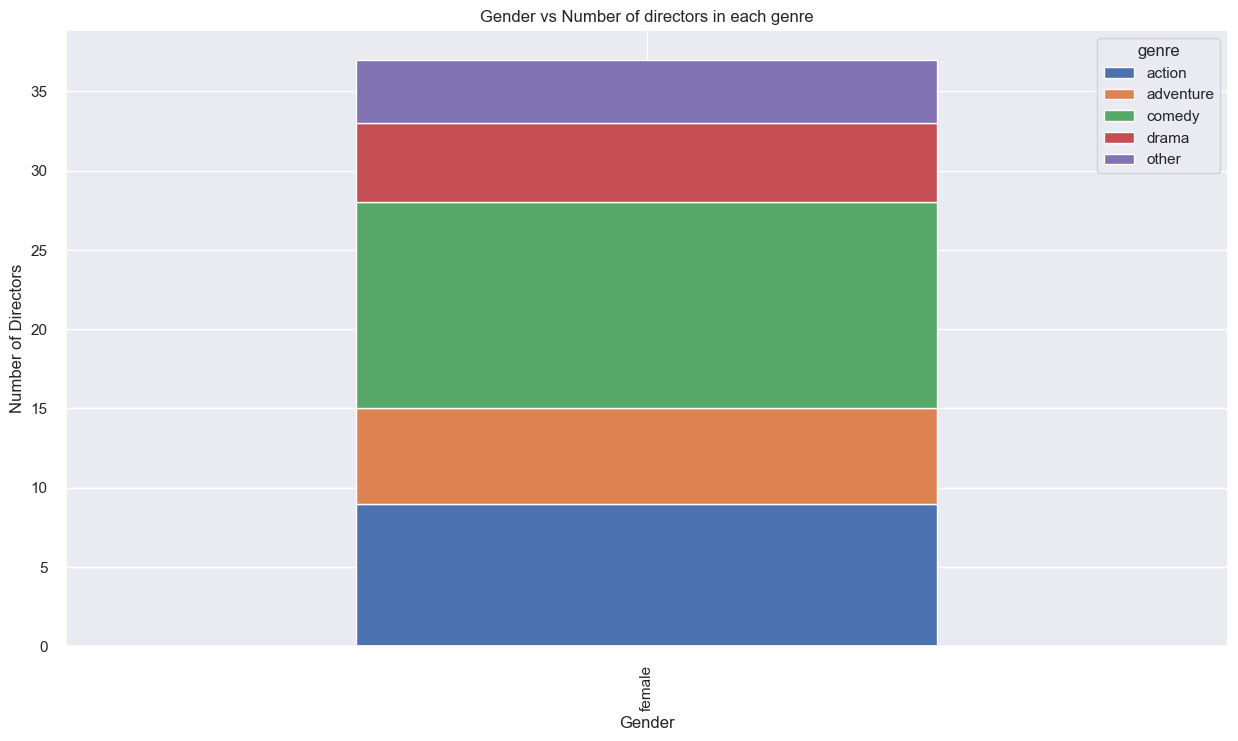

In [20]:

#The first line of code creates a contingency table that displays the number of movies per genre and 
#director gender using the pd.crosstab function. The output of this table is then displayed.
cond_table = pd.crosstab(df["genre"], df["dirGender"])
display(cond_table)

cond_table.plot.bar(stacked = True)
plt.ylabel('Number of directors')
plt.show()

#Generate a stacked bar graph of each gender using the groupby and plot functions from Pandas. 
df.groupby(["dirGender", "genre"]).size().unstack().plot(kind="bar", stacked=True)

plt.title('Gender vs Number of directors in each genre')
plt.xlabel("Gender")
plt.ylabel('Number of Directors')
plt.show()


#The last two lines of code generate another stacked bar graph but only for female directors. 
#The purpose of these graphs is to visually represent the gender imbalance across movie genres in the dataset.
tempdf = df[df['dirGender']=='female']

tempdf.groupby(["dirGender", "genre"]).size().unstack().plot(kind="bar", stacked=True)

plt.title('Gender vs Number of directors in each genre')
plt.xlabel("Gender")
plt.ylabel('Number of Directors')
plt.show()

In [21]:

#The code generates and displays a contingency table of the proportion of director gender between comedy and non-comedy movies. 

#It first creates a subset of the data frame df where the genre is 'comedy' and stores the result in tempdf. 
tempdf = df[df['genre']=='comedy']

#Then, a cross-tabulation table table is created using pd.crosstab function between genre and director gender, 
#which only contains the rows for 'comedy' genre and the margins. 
table = pd.crosstab(tempdf["genre"], tempdf["dirGender"], margins = True)
    
#The second step is to create another subset of df where the genre is not 'comedy' and store the result in tempdf. 
#Another cross-tabulation table cond_table is created between genre and director gender for this new subset.
tempdf = df[df['genre'] !='comedy']


"""
Finally, the code combines the first row (for 'comedy' genre) of the cross-tabulation table table and the last row (margins) 
of cond_table, resulting in a 2x2 contingency table that displays the proportions of director gender between comedy and 
non-comedy movies. 

"""
cond_table = pd.crosstab(tempdf["genre"], tempdf["dirGender"], margins = True)

table = pd.concat([table.iloc[0, 0:3], cond_table.iloc[4, 0:3]], axis=1)

#After some column renaming, the contingency table is then displayed using the display function.
table.rename(columns = {'All':'non-comedy'}, inplace = True)

table['All'] = table['comedy']+table['non-comedy']
display(table)

comedy  non-comedy  All
dirGender                         
female         13          24   37
male           35         178  213
All            48         202  250

In [22]:
P_C_F = table.iloc[0, 0]/table.iloc[0, 2]

print(f'The probability that the movie is a comedy given that the director Gender is female is {P_C_F*100:.2f} %')

P_C_M = table.iloc[1, 0]/table.iloc[1, 2]

print(f'The probability of the movie being a comedy given that the director Gender is male is {P_C_M*100:.2f} %')

F_M = P_C_F - P_C_M

print(f'The difference between them is {F_M*100:.2f} %')

The probability that the movie is a comedy given that the director Gender is female is 35.14 %
The probability of the movie being a comedy given that the director Gender is male is 16.43 %
The difference between them is 18.70 %


# Conditional probability function 

In [23]:
"""

The code in the focal cell defines a function called condProbs(df) which takes a pandas dataframe df as an input. 
This function calculates the probability that the movie is a comedy given that the director's gender is female (p(comedy|female)),
the probability that the movie is a comedy given that the director's gender is male (p(comedy|male)), 
and the difference between these two probabilities (p(comedy|female) - p(comedy|male)).

"""

def condProbs(df):
    
    #The function starts by extracting two dataframes tempdf from the input dataframe df. 
    #One of the dataframes contains all the rows where the genre is comedy and the other contains all the rows 
    #where the genre is not comedy for creating conditional tables.
    tempdf = df[df['genre'] =='comedy']

    table = pd.crosstab(tempdf["genre"], tempdf["dirGender"], margins = True)

    tempdf = df[df['genre'] !='comedy']

    cond_table = pd.crosstab(tempdf["genre"], tempdf["dirGender"], margins = True)

    table = pd.concat([table.iloc[0, 0:3], cond_table.iloc[4, 0:3]], axis=1)

    table.rename(columns = {'All':'non-comedy'}, inplace = True)

    table['All'] = table['comedy']+table['non-comedy']
    
    """
    After that, the function calculates the probabilities p(comedy|female) or 'P_C_F' and 
    p(comedy|male) or 'P_C_M' by dividing the count of comedy movies directed by female and 
    male directors by the total count of movies directed by female and male directors, 
    respectively. Finally, the function returns the values of p(comedy|female), p(comedy|male), 
    and the difference, or 'F_M', between the two probabilities (p(comedy|female) - p(comedy|male)).
    
    """
    P_C_F = table.loc['female', 'comedy']/table.loc['female', 'All']
    P_C_M = table.loc['male', 'comedy']/table.loc['male', 'All']
    F_M = P_C_F - P_C_M
    
    return F_M

# Permutation functions  

In [24]:

#Helper function to permutate one column in the dataframe
def colPerm(table, columnNum=0, column = None):
    
    if column == None:
        columns = table.columns
        column = columns[ColumnNum]
        
    #Copy table and reset index 
    copyTable = table.copy()
    copyTable.reset_index(inplace=True)
    
    #Shuffle the column 
    idx = copyTable.index
    idx_arr = np.arange(0, len(idx))
    np.random.shuffle(idx_arr)
    
    #Add the shuffled column into the dataframe and return the dataframe 
    shuffled_column = copyTable[column].iloc[idx_arr]
    shuffled_column_id = shuffled_column.reset_index(drop=True)
    copyTable[column] = shuffled_column_id
    copyTable.drop(['index'], axis=1, inplace=True)
    
    return copyTable 

"""

Perform a permutation test to test the hypothesis that female directors are more likely 
to conduct comedies than male directors. It does this by shuffling the director gender column of the data frame, 
calculating the probabilities of comedy given female and comedy given male, and then finding the difference. 
This is done "numIter" number of times and the results are stored in a list. 
The code also plots a histogram of the test statistics and calculates the p-value in two ways.

"""
def permutation_test(df, numIter):
    
    List = []
    
    n = 0
    while n < numIter:
        
        print(f'Iteration: {n}', end = '\r')
        table = colPerm(df, column='dirGender')
        
        diff = condProbs(table)
        
        #Sometimes creates a Nan value which needs to be filtered out 
        point = [diff]
        NAN = np.isnan(point)
        
        if not(any(NAN)):
            List.append(point)
            n+=1
        
    return np.array(List)

#Confidence interval function
def confidenceInt(data, prec):
    
    # 0 < prec < 100
    prec = (100-prec)/2

    #Get the bottom data point of percentile (prec)
    lower = np.percentile(data, prec)
    
    mean = data.mean()
    
    median = np.percentile(data, 50)
    #Get the top data point of percentile (100 - prec)
    upper = np.percentile(data, 100-prec)
    return [lower, mean, median, upper]

#Final function that does the permutation test and plots the final results 
def Plot(df, numIter):
    
    arr = permutation_test(df, numIter)
    print('\r')
    Titles = ['Difference between P(Comedy|Female) and P(Comedy|Male)']
    
    #Original values calculated in the beginning 
    Emperical_values = [F_M]
    
    Bins = np.arange(-0.3, 0.31, 0.05)
    
    #For each test statistic do the following 
    for i in range(arr.shape[1]):

        data = arr[:, i]
        
        Bounds = confidenceInt(data, 95)
        
        #Plot the vertical lines 
        plt.axvline(x=Bounds[0], color='g', linewidth=2, label='2.5% percentile')
        plt.axvline(x=Emperical_values[i], color='r', linewidth=2, label='Emperical Result')
        plt.axvline(x=Bounds[3], color='g', linewidth=2, label='97.5% percentile')
 
        #Method 1
        #Get the p-value:
        data = np.array(data)
        BOOL = data >= Emperical_values[i]
        
        P = np.average(BOOL)
        #print('M1:', P)
        #This calculation below is to find p-values from both ends of a normal distribution 
        if P > 0.5:
            P = 2 * (1 - P)
            
        else:
            
            P = 2 * P
            
        #Method 2 
        #Get the p-value:
        P2 = ss.percentileofscore(data, Emperical_values[i])
        #print('M2:', P2)
        
        #This calculation below is to find p-values from both ends of a normal distribution 
        if P2 > 50:
            P2 = 2 * (100 - P2)
            
        else:
            
            P2 = 2 * P2
            
        #Plot with titles and labels 
        plt.title(Titles[i])
        plt.hist(data, bins = Bins)
        plt.legend()
        plt.ylabel('Counts')
        plt.xlabel('Probability')
        plt.show()
        
        print(f'Method 1 P-value: {P:.8f}')
        print(f'Method 2 P-value: {P2:.8f}')
        print()


Iteration: 499


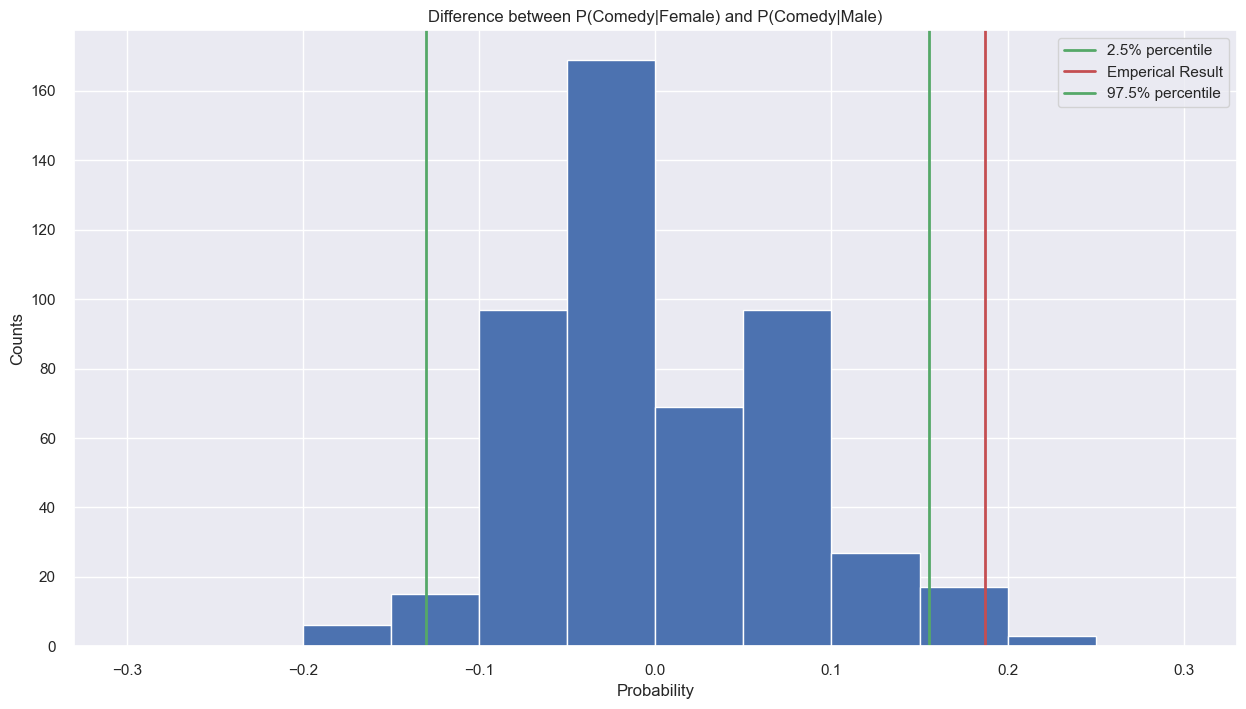

Method 1 P-value: 0.03200000
Method 2 P-value: 2.00000000



In [25]:
#Test permutation function
Plot(df, 500)

# Randomization functions 

In [26]:


def ChiSquare(df, column='genre', row='dirGender'):

    """
    
    The function first creates the contingency table using pd.crosstab with the specified columns, 
    then calculates the expected frequencies using the product of the marginal sums, divided by the overall sum. 
    It then converts the expected frequencies to a DataFrame with the same column names and index 
    as the original contingency table.
    """
    
    cond_table = pd.crosstab(df[row], df[column], margins=True)
    #print('Observed Conditional Table')
    #display(cond_table)
    margCol = np.array(cond_table.iloc[:-1, cond_table.shape[1]-1])
    margCol = margCol.reshape(-1, 1)
    margRow = np.array([cond_table.iloc[cond_table.shape[0]-1]])

    expectedArray = np.outer(cond_table.iloc[:-1, cond_table.shape[1]-1], cond_table.iloc[cond_table.shape[0]-1, :-1])

    expectedArray = expectedArray/cond_table.loc['All', 'All']

    expectedArray = np.concatenate((expectedArray, margCol), axis = 1)
    expectedArray = np.concatenate((expectedArray, margRow), axis = 0)

    expectedTable = pd.DataFrame(expectedArray, columns = [cond_table.columns], index = [cond_table.index])
    #print('Expected Conditional Table')
    #display(expectedTable)
    """
    
    The function finally calculates the Chi-square statistic by summing up the squares of the deviations 
    between the observed and expected frequencies, divided by the expected frequencies, over all cells. 
    The Chi-square value is returned as the result of the function.
    
    """
    
    #ChiMatrix = (O - E)^2
    chiMatrix = ((np.array(expectedTable.iloc[:-1, :-1]) - np.array(cond_table.iloc[:-1, :-1]))**2)
    
    #ChiMatrix = ChiMatrix/E
    chiMatrix = np.multiply(chiMatrix, 1/np.array(expectedTable.iloc[:-1, :-1]))

    return np.sum(chiMatrix)


def randomization(df, func, colName, numIter=500, numSides=1, Bins=None):

    List = []
    
    #The original test statistic is calculated using the func function and stored in the Emperical_Value variable. 
    Emperical_Value = func(df)
    
    #The code then enters a while loop and performs the following steps numIter times:
    n = 0
    while n < numIter:

        #Copy table and reset index 
        table = df.copy()
        table.reset_index(inplace=True)

        #Shuffle the column 
        idx = table.index
        idx_arr = np.arange(0, len(idx))
        np.random.shuffle(idx_arr)

        #Add the shuffled column into the dataframe and return the dataframe 
        shuffled_column = table[colName].iloc[idx_arr]
        shuffled_column_id = shuffled_column.reset_index(drop=True)
        table[colName] = shuffled_column_id
        table.drop(['index'], axis=1, inplace=True)
    
        print(f'Iteration: {n}', end = '\r')
        
        #Sometimes creates a Nan value which needs to be filtered out 
        point = [func(table)]
        NAN = not(any(np.isnan(point)))
        INF = not(any(np.isinf(point)))
        if (NAN and INF):
            List.append(point)
            n+=1

    #Get the p-value from two sides:
    data = np.array(List)
    
    if numSides == 2:
        P = np.average(np.absolute(data) >= Emperical_Value)
    else:
        P = np.average(data >= Emperical_Value)
        
    #Lower tail transformation for single end and double ends
    if P > 0.5:
        P = 1 - P
        
    #Plot the emperical value
    plt.axvline(x=Emperical_Value, color='r', linewidth=2, label='Emperical Result')
    
    #Plot the data as a histogram and show the p-value 
    plt.title(colName)
    if Bins == None:
        plt.hist(data)
    else:
        plt.hist(data, bins = Bins)
        
    plt.legend()
    plt.ylabel('Counts')
    plt.xlabel('Probability')
    plt.title('Randomization test histogram using test statistic')
    plt.show()

    print(f'P-value: {P:.8f}')
    print()

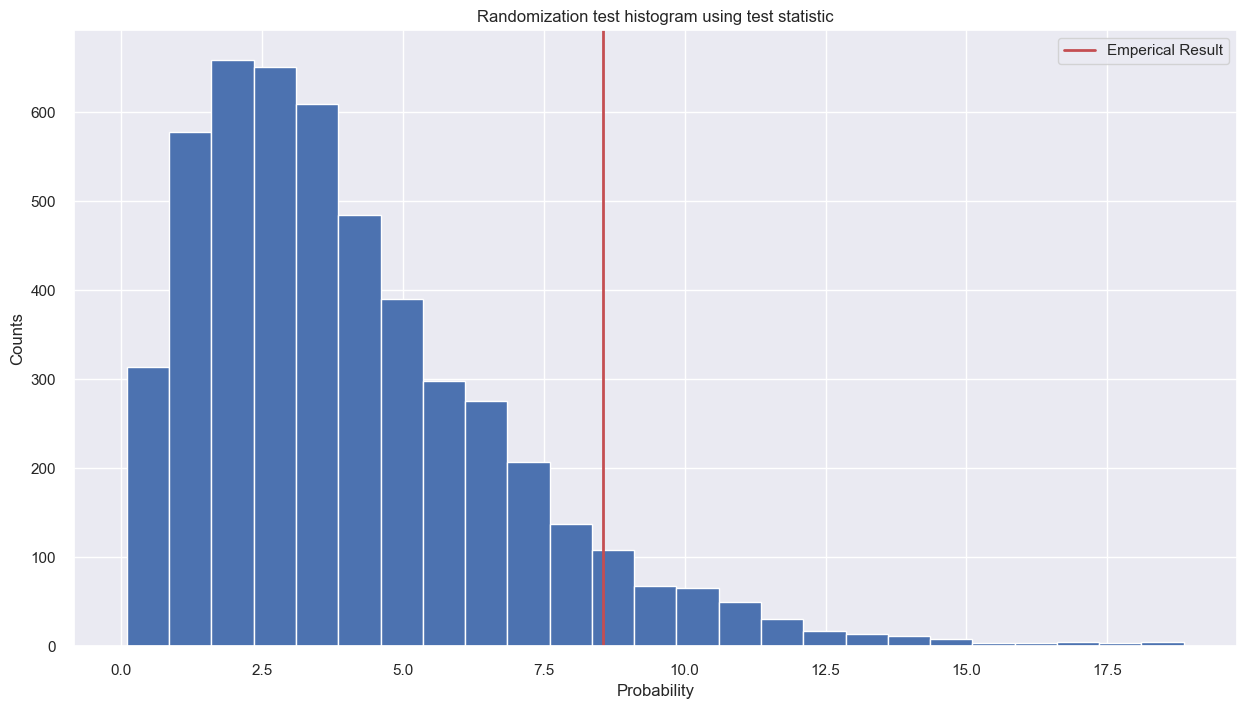

P-value: 0.07420000



In [27]:
randomization(df, ChiSquare, 'dirGender', numIter=5000, numSides=1 , Bins=25)

# Monte Carlo functions 

In [28]:
#This function finds the difference between average director income between the 2 genders 

def diffMean(df):
    
    tempDf = df[df['dirGender']=='male']
    
    mavg = tempDf['dirIncome'].mean()
    
    tempDf = df[df['dirGender']=='female']
    
    favg = tempDf['dirIncome'].mean()
    
    return mavg-favg

#Monte Carlo simulation using a random binomial probabiblity distribution that returns the list of number of heads it flipped
def monteCarloSim(p, N, numIter):
    
    List = []
    
    for i in range(numIter):
        
        numHeads=np.random.binomial(N,p)
        List.append(numHeads)
        
    return np.array(List)

#Monte Carlo Test function shows probabiblity distribution of 
def monteCarloTest(H0prob, HAprob, N, numHeads):
    
    #Flip the coin with H0prob probability and return 2000 trials 
    H0data = monteCarloSim(H0prob, N, 5000)
    
    HAdata = monteCarloSim(HAprob, N, 5000)
    
    #Plot the data
    plt.hist(H0data, label='H0', alpha=0.6)
    plt.hist(HAdata, label='HA', alpha=0.6)
    plt.axvline(x=numHeads, color='r', linewidth=2, label='Emperical Result')

    #Performs p-value for lower-sided tail
    p = np.average(H0data <= numHeads)
    power = np.average(HAdata <= numHeads)
    Typ2Err = 1 - power
    plt.title('Monte Carlo Simulation')
    plt.legend()
    plt.ylabel('Counts')
    plt.xlabel('Probability')
    plt.show()
    
    print(f'P-value: {p:.5f}')
    print(f'Power: {power:.5f}')
    print()

# Bayesian Monte Carlo Function 

In [29]:
#Monte Carlo Test function shows probabiblity distribution of 
def bayesMonteCarloTest(H0prob, HAprob, N, numHeads):
    
    #Flip the coin with H0prob probability and return 2000 trials 
    H0data = monteCarloSim(H0prob, N, 5000)
    
    HAdata = monteCarloSim(HAprob, N, 5000)
    
    #Plot the data
    plt.hist(H0data, label='H0', alpha=0.6)
    plt.hist(HAdata, label='HA', alpha=0.6)
    plt.axvline(x=numHeads, color='r', linewidth=2, label='Emperical Result')

    #Performs p-value for lower-sided tail
    p = np.average(np.absolute(H0data) <= numHeads)
    power = np.average(HAdata <= numHeads)
    Typ2Err = 1 - power
    
    p1 = np.average(HAdata == numHeads)
    p0 = np.average(H0data == numHeads)
    BF = p1/p0
    
    posterior = 0.5*p1/(0.5*p1+0.5*p0)
    plt.title('Monte Carlo Simulation')
    plt.legend()
    plt.ylabel('Counts')
    plt.xlabel('Probability')
    plt.show()

    print(f'Bayes Factor: {BF:.5f}')
    print(f'Posterior if prior is 0.5: {posterior:.5f}')
    
    print()

In [30]:
df = pd.read_csv('births.csv')

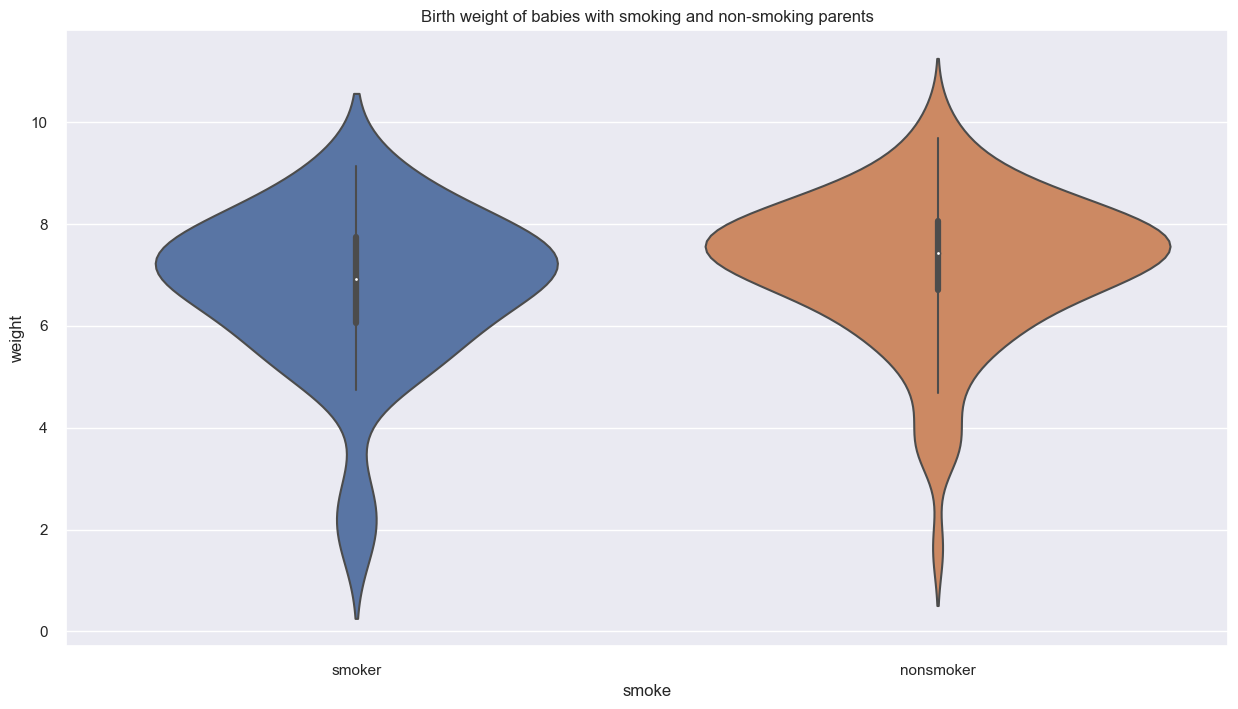

In [31]:
sns.violinplot(data = df, x = "smoke", y = "weight", )
plt.title('Birth weight of babies with smoking and non-smoking parents')
plt.show()

In [32]:
#This function finds the difference between average director income between the 2 genders 

def diffMean(df):
    
    tempDf = df[df['smoke']=='smoker']
    
    mavg = tempDf['weight'].mean()
    
    tempDf = df[df['smoke']=='nonsmoker']
    
    favg = tempDf['weight'].mean()
    
    return mavg-favg


def randomization(df, func, colName, numIter=500, numSides=1, Bins=None):

    List = []
    
    #The original test statistic is calculated using the func function and stored in the Emperical_Value variable. 
    Emperical_Value = func(df)
    
    #The code then enters a while loop and performs the following steps numIter times:
    n = 0
    while n < numIter:

        #Copy table and reset index 
        table = df.copy()
        table.reset_index(inplace=True)

        #Shuffle the column 
        idx = table.index
        idx_arr = np.arange(0, len(idx))
        np.random.shuffle(idx_arr)

        #Add the shuffled column into the dataframe and return the dataframe 
        shuffled_column = table[colName].iloc[idx_arr]
        shuffled_column_id = shuffled_column.reset_index(drop=True)
        table[colName] = shuffled_column_id
        table.drop(['index'], axis=1, inplace=True)
    
        print(f'Iteration: {n}', end = '\r')
        
        #Sometimes creates a Nan value which needs to be filtered out 
        point = [func(table)]
        NAN = not(any(np.isnan(point)))
        INF = not(any(np.isinf(point)))
        if (NAN and INF):
            List.append(point)
            n+=1

    #Get the p-value from two sides:
    data = np.array(List)
    
    if numSides == 2:
        plt.axvline(x=-Emperical_Value, color='r', linewidth=2, label='Negative Emperical Result')
        P = np.average(np.absolute(data) >= np.absolute(Emperical_Value))
    else:
        P = np.average(data <= Emperical_Value)
        
    #Lower tail transformation for single end and double ends
    if P > 0.5:
        P = 1 - P
        
    #Plot the emperical value
    plt.axvline(x=Emperical_Value, color='r', linewidth=2, label='Emperical Result')
    
    #Plot the data as a histogram and show the p-value 
    plt.title(colName)
    if Bins == None:
        plt.hist(data)
    else:
        plt.hist(data, bins = Bins)
        
    plt.legend()
    plt.ylabel('Counts')
    plt.xlabel('Probability')
    plt.title('Randomization test histogram using test statistic')
    plt.show()

    print(f'P-value: {P:.5f}')
    print()
    
    return data

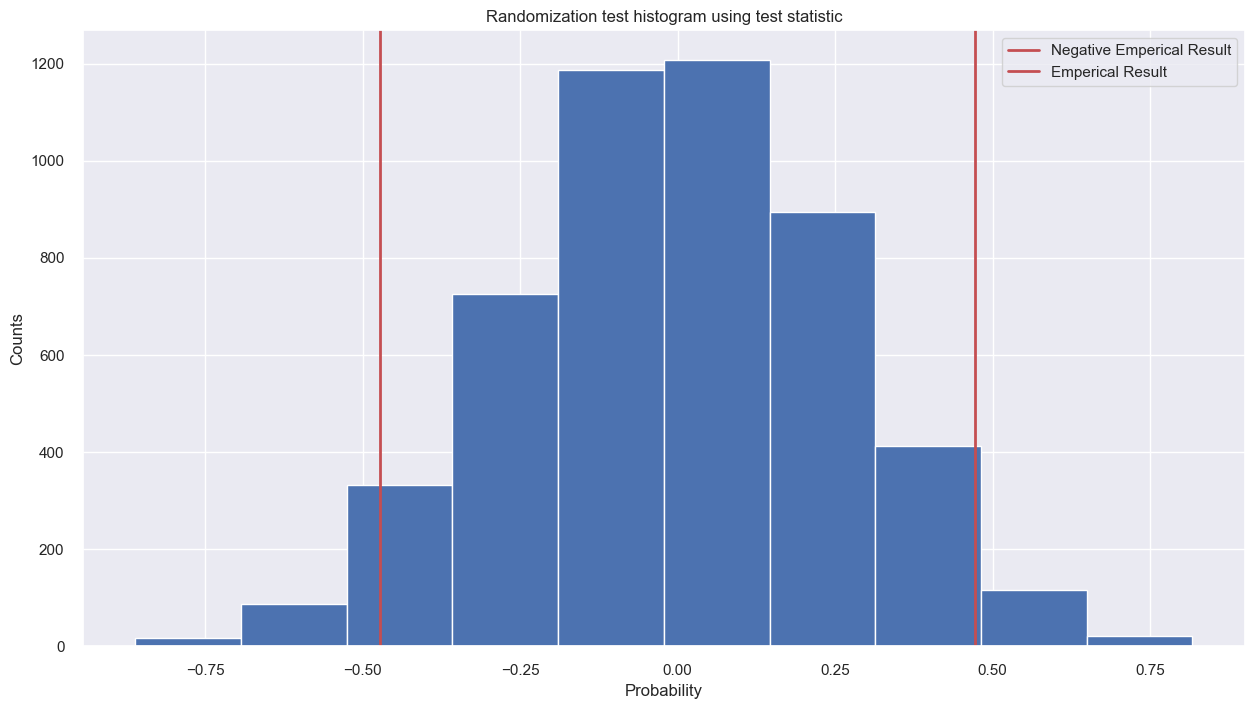

P-value: 0.06600



In [33]:
data1 = randomization(df, diffMean, 'smoke', numSides=2, numIter=5000)

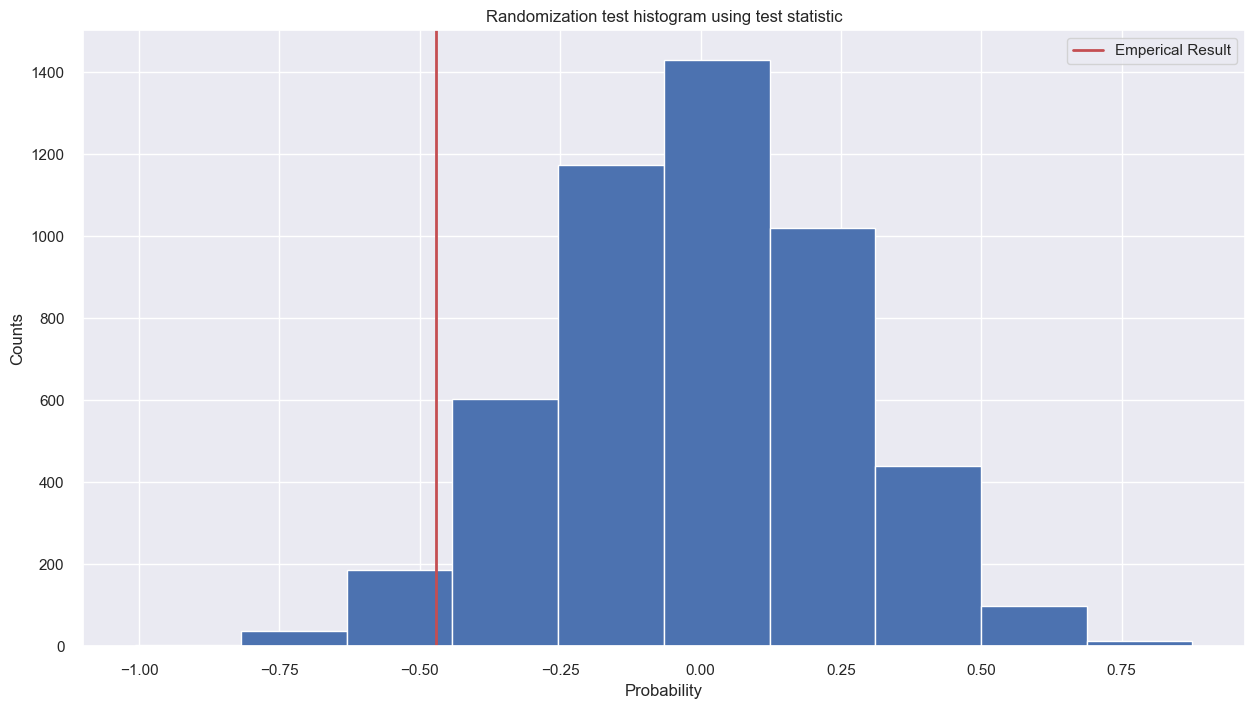

P-value: 0.03600



In [34]:
data2 = randomization(df, diffMean, 'smoke', numSides=1, numIter=5000)

# Bayes Factor code 

In [35]:

std0 = np.std(data1)
std1 = np.std(data2)

print(f'Standard Deviation from question 2 data: {std0}')
print(f'Standard Deviation from question 3 data: {std1}')

# reading from the normal pdf from scipy stats
p0 = ss.norm.pdf(diffMean(df), 0, 0.25)

p1 = ss.norm.pdf(diffMean(df), -0.5, 0.25)

# Calculate BF10
BF = p1/p0
print(f'Bayes Factor: {BF:.8f}')


#posterior1 = P(H|D) = P(D|HA)*p(HA)/(P(D|HA)*p(HA) + P(D|H0)*p(H0))


prior0 = 0.7
prior1 = 1 - prior0
posterior1 = (prior1*p1)/(prior1*p1 + prior0*p0)
print(posterior1)

Standard Deviation from question 2 data: 0.2559918254006686
Standard Deviation from question 3 data: 0.25585910261634237
Bayes Factor: 5.88731479
0.7161618768432492


### Question 2.4 (13pts)
Based on this result, the reviewers of the paper asked for a Bayesian test to determine how strong the evidence for the Null-hypothesis (that tDCS does not cause a difference in Error rate in the Post-test). 

The Null-hypothesis (H0) is that the average error rate difference is normally distributed with mean zero and standard deviation 0.02. 

The alternative hypothesis (H1) is undirected: 
With p=0.5, the error rate difference is normally distributed with mean 0.03 and standard deviation of 0.02
With p=0.5, the error rate difference is normally distributed with mean -0.03 and standard deviation of 0.02. 

What is the Bayes Factor for H0 vs. H1? Is the evidence in favor of the the H0 or H1? How strong is that evidence (according to Kaas & Rafetery's convention)? 

*Hint:* If you have problems solving this for the undirected hypothesis, simply solve it for the directed hypothesis that states that the error rate difference is normally distributed with mean -0.03 (Higher error rate for Experimental than control group) and standard deviation of 0.02. You will loose 5 points, but at least you can show that you can do a Bayesian test (total worth 8pts).   

In [36]:

# 1pt for function 
def error_difference(df):  
    A = df.groupby('tDCS').Error_post.mean()
    return A[0]-A[1]

error_difference(D)

# 2pts for correct mean diference and std. 
se=0.02 # Standard error of mean difference 
d = error_difference(D) #Mean difference
print('mean difference:',d)

# 2 pts for correct p under H0 
p0 = ss.norm.pdf(d,0,se) # Probability of data under the H0 (p(Data|H0))
print('probability under H0:',p0)

# 6 points for correct p under H1 (1pt if one-sided)
p1 = 0.5* ss.norm.pdf(d,-0.03,se) # Probability of the data under the H1 (p(Data|H1))
+ 0.5 * ss.norm.pdf(d,0.03,se) # Probability of the data under the H1 (p(Data|H1))
print('probability under H1:',p1)
BF = p0/p1  # Bayes factor 
print('Bayes Factor:',BF)

NameError: name 'D' is not defined

In [ ]:
D = pd.read_csv('possum.csv')

# Simple Linear regression functions 

In [40]:

#The line variable b should be a list = [intercept, slope]
def simpleRegPredict(b,x): 
    
    #Converts lists into numpy arrays
    if str(type(b)) == '<class \'list\'>':
        
        b = np.array(b)
        
    if str(type(x)) == '<class \'list\'>':
        
        x = np.array(x) 

    return x*b[1]+b[0]

#A simple regular residual sum of squares loss function that given the line of fit returns the error and derivative of the intercept and slope
def simpleRegLossRSS(b,x,y):

    y_pred = simpleRegPredict(b, x)
    
    residues = (y - y_pred)

    residueSquaredSum = sum(residues**2)
    
    gradient = np.zeros(2)

    gradient[0] = -2*sum(residues)
    gradient[1] = -2*sum(residues*x)

    return [residueSquaredSum, gradient]

#Plot a scatter plot with the best line of fit and an R^2 score 
def simpleRegFit(x,y): 
    
    b0 = np.zeros((2))

    RESULT = so.minimize(simpleRegLossRSS,b0,args=(x,y),jac=True)
    
    plotPrediction(RESULT['x'],x,y)
    
    Mean = y.mean()

    TotSumSqua = sum((y - Mean)**2)

    y_pred = simpleRegPredict(RESULT['x'], x)
    
    residues = (y - y_pred)

    residueSquaredSum = sum(residues**2)

    R2 = 1 - residueSquaredSum/TotSumSqua
    
    return RESULT['x'], R2

#plots a scatterplot with a regression line
def plotPrediction(b,x,y,fcn=simpleRegPredict):
    
    #Converts lists into numpy arrays
    if str(type(b)) == '<class \'list\'>':
        
        b = np.array(b)
        
    if str(type(x)) == '<class \'list\'>':
        
        x = np.array(x) 
        
    if str(type(y)) == '<class \'list\'>':
        
        y = np.array(y) 
        
    #Make the regression line 
    xpoints = np.linspace(min(x)-1, max(x)+1, 10000)
    
    ypoints = simpleRegPredict(b, xpoints)
    
    #Plot the graph
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(x, y)
    plt.plot(xpoints, ypoints, label= f'Regession line (y = {b[1]}x + {b[0]})', color='r')
    plt.xlabel('Age (Years)')
    plt.ylabel('Head Length (mm)')
    plt.legend()
    plt.title('Scatterplot with Regression Line')

# Poly regression functions 

In [41]:
def polyRegPredict(b,x):
    yp=np.zeros(x.shape)
    for i in range(len(b)):
        yp=yp+b[i]*(x**i)
    return yp 


#A simple regular residual sum of squares loss function that given the line of fit returns the error and derivative of the intercept and slope
def polyRegLossRSS(b,x,y):

    y_pred = [polyRegPredict(b, x_val) for x_val in x]
    
    residues = (y - y_pred)

    residueSquaredSum = sum(residues**2)
    
    gradient = np.array([-2 * sum(residues * x ** i) for i in range(len(b))])

    return [residueSquaredSum, gradient]

#plots a scatterplot with a regression line
def plotPrediction(b,x,y,fcn=simpleRegPredict):
    
    #Converts lists into numpy arrays
    if str(type(b)) == '<class \'list\'>':
        
        b = np.array(b)
        
    if str(type(x)) == '<class \'list\'>':
        
        x = np.array(x) 
        
    if str(type(y)) == '<class \'list\'>':
        
        y = np.array(y) 
        
    #Make the regression line 
    xpoints = np.linspace(min(x), max(x), 10000)
    
    ypoints = polyRegPredict(b, xpoints)
    
    #Plot the graph
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(x, y)
    plt.plot(xpoints, ypoints, label= f'Regession line', color='r')
    plt.xlabel('Fertilizer Concentration (ml/week/m2)')
    plt.ylabel('Harvest Yield (kg/patch)')
    plt.title('Relationship between Fertilizer Concentration and Harvest Yield')
    plt.legend()

#Plot a scatter plot with the best line of fit and an R^2 score 
def polyRegFit(x,y, order): 
    
    b0 = list(np.zeros((order+1)))

    RESULT = so.minimize(polyRegLossRSS, b0, args=(x,y),jac=True)
    
    plotPrediction(RESULT['x'],x,y)
    
    Mean = y.mean()

    TotSumSqua = sum((y - Mean)**2)

    residueSquaredSum = RESULT.fun

    R2 = 1 - residueSquaredSum/TotSumSqua
    
    return R2, RESULT['x']



# Leave one out Cross-validation and model comparison functions 

In [42]:
#Leave each data point out as the test setâ€“ use all other data points for training
#Returns the cross validated R2 (pre R2) and fitted R2 (post R2)
def leaveOneOutCV(x, y, fit_function, fit_args, predict_function):
    n = len(x)
    y_pred = np.zeros(n)
    
    for i in range(n):

        x_train = x.copy()
        y_train = y.copy()
        
        x_test = np.array([x_train.pop(i)])
        y_train.pop(i)
        
        preR2, b = fit_function(x_train, y_train, *fit_args)
        plt.close()
        
        y_pred[i] = polyRegPredict(b, x_test)
        
    preR2 = R2score(y, y_pred)
    
    postR2, b = fit_function(x, y, *fit_args)
    
    plt.close()
    
    return preR2, postR2

#loo_r2, fitted_r2 = leaveOneOutCV(df['fertCon'], df['harvest'], polyRegFit, [2], polyRegPredict)
#print("Cross-validated R2:", loo_r2)
#print("Fitted R2:", fitted_r2)

#Compares different best fit polynomial and returns a graph  
def modelComparison(x, y, lower, upper):
    
    pre_r2_list = []
    post_r2_list = []
    
    for i in range(lower, upper+1):
        print(f'Model Order: {i}', end = '\r')

        pre_r2, post_r2 = leaveOneOutCV(x, y, polyRegFit, [i], polyRegPredict)
        
        pre_r2_list.append(pre_r2)
        post_r2_list.append(post_r2)

    #Plot the graph
    fig = plt.figure()
    x = np.arange(lower, upper+1, 1)
    y = np.arange(0, 1.1, 0.1)
    ax = fig.add_subplot(1,1,1) 
    ax.plot(x, pre_r2_list, label= f'Cross validated R2')
    ax.plot(x, post_r2_list, label= f'Fitted R2')
    plt.yticks(y)
    plt.grid(True)
    plt.xlabel('Model Order')
    plt.ylabel('R^2 score')
    plt.title('Polynomial Model Comparison')
    plt.legend()
    plt.show()

# Multi regression function 

In [43]:
def multRegPredict(b, D, xname):
    
    yp = np.ones(len(D.index)) * b[0]
    
    for i in range (len(xname)):
        yp += D[xname[i]] * b[i + 1]
    
    return yp

"""
plt.scatter(df["read"], df["score"])

yp = multRegPredict([134, 11.8], df, ["read"])
plt.scatter(df["read"], yp)
plt.title('Reading time of children VS children IQ score')
plt.xlabel("Average number of hours the child is read to per week")
plt.ylabel("IQ Score")
plt.show()"""

def multRegLossRSS(b,D,y,xname):
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res)
    return (rss,grad)

"""RSS, grad = multRegLossRSS([134,11.8],D,D.score,['read'])

print('The Rss value is %f' % RSS)
print('The gradient is', grad)"""



def multRegLossRSS(b, D, y, xname):
    
    yp = multRegPredict(b, D, xname)
    
    res = y - yp
    
    RSS = sum(res**2)

    deriv = np.zeros(len(b))
    
    #derivative for intercept
    deriv[0] = -2 * sum(res)   
    
    #derivative for each variable's slope 
    for i in range (len(b) - 1):
        xi = D[xname[i]]
        deriv[i + 1] = -2 * np.sum(xi * res)
    
    return RSS, deriv
"""
RSS, deriv = multRegLossRSS([134, 11.8], df, df["score"], ["read"])

print(f"RSS: {RSS:.5f}")
print(f"Derivative Gradient: {deriv}")"""

def multRegFit(D, y, xname):
    
    b = np.zeros(len(xname) + 1)

    mi = so.minimize(multRegLossRSS, b, args = (D, y, xname), jac = True)

    RSS = mi.fun
    TSS = sum((y - np.mean(y))**2)
    
    R2 = 1 - RSS/TSS
    
    return R2, mi.x

# Leave one out crossvalidation function 

In [44]:
def leaveOneOutCV (D, y, args = (), fitfcn = multRegFit, predictfcn = multRegPredict):
    
    #creates number of runs equal to size of the number of data points
    n = len(y)
    
    #creates folds
    ind = np.arange(len(D.index))    
    folds = np.array_split(ind, n)
    
    #creates predicted array
    yp_cv = np.zeros(len(D.index))    
    
    #splits data to training and testing
    for i in np.arange(n):           
        folds_cp = folds.copy()
        test_ind = folds[i]
        df_test = D.loc[test_ind]

        # delete the test set indices
        del folds_cp[i]      

        # concatenate all the remaining indices into 1 array
        train_ind = np.concatenate(folds_cp, axis = 0) 
        df_train  = D.loc[train_ind]

        y_train = df_train["score"]
        
        #gets fit
        R2, b = fitfcn(df_train, y_train, args) 
        
        #finds yp for the fit
        yp_cv[test_ind] = predictfcn(b, df_test, args)     
    
    #finds TSS, RSScv and R2cv
    TSS = sum((y-y.mean())**2)      
    RSScv = sum((y-yp_cv)**2)
    R2cv  = 1-RSScv/TSS
        
    return R2cv


# Bootstrap and CI functions for regression parameters 

In [ ]:
def bootstrapReg(D, y, args, fitfcn, numIter = 500):
    
    R2, b = fitfcn(D, y, args)
    
    numParams = len(b)
    
    N = len(y)
    ind = np.arange(N)
    stat = np.zeros((numIter, numParams))
    
    for i in range (numIter):
        sample = np.random.choice(ind, N)
        R2, b = fitfcn(D.loc[sample], y.loc[sample], args)
        stat[i, :] = b
        
    return stat

def confidenceInt (data, prec):
    #calculates the lower and upper bound and adds to the list which is returned
    LB = np.percentile(a = data, q = (100-prec)/2)
    UB = np.percentile(a = data, q = 100 - (100-prec)/2)

    return [LB, UB]    


"""

stat = bootstrapReg(df, df["score"], ['edutv', 'cartoons'], multRegFit)
slopetv = stat[: ,1]
conftv = confidenceInt(slopetv, 95)
print(f"95% Confidence interval for edutv is: {conftv}")

slopecartoons = stat[: ,2]
confcartoons = confidenceInt(slopecartoons, 95)
print(f"95% Confidence interval for cartoon is: {confcartoons}")

plt.scatter(slopetv, slopecartoons)
plt.title('Comparison of the slope of 2 variables to predict the R2 score')
plt.xlabel("Slope of Edutv")
plt.ylabel("Slope of Cartoon")


"""

# Discrete regression 

In [45]:
"""title='Possum Age vs Body Length'
xlabel="Age(Years)"
ylabel="Body Length (cm)"

temp1df = tempdf[tempdf['popl'] == 0]
mean1 = temp1df['bodyL'].mean()
plt.scatter(temp1df['age'], temp1df["bodyL"], color='b', label='Non-Victoria Sample')
plt.plot(temp1df['age'], temp1df["predBodyL"], color='b', label='Regression line')

temp1df = tempdf[tempdf['popl'] == 1]
mean2 = temp1df['bodyL'].mean()
plt.scatter(temp1df['age'], temp1df["bodyL"], color='g', label='Victoria Sample')
plt.plot(temp1df['age'], temp1df["predBodyL"], color='g', label='Regression line')

plt.legend()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

stat = bootstrapReg(df, df["bodyL"], ['popl', 'age'], multRegFit)

slope = stat[: ,1]

plt.hist(slope)
plt.title('Location parameter slope distribution')
plt.show()
conf = confidenceInt(slope, 95)
print(f"95% Confidence interval is: {conf}")

slope = stat[: ,2]
print()
plt.title('Age parameter slope distribution')
plt.hist(slope)
plt.show()
conf = confidenceInt(slope, 95)
print(f"95% Confidence interval is: {conf}")"""



def logisticRegPredict(b, D, xname):
    
    yp = np.ones(len(D[xname].index)) * b[0]
    
    for i in range (len(xname)):
        yp += D[xname[i]] * b[i + 1]
    
    lyp = 1/(1+np.e**-yp)
    
    return lyp

def logisticRegLoss(b, D, y, xname):
    p = logisticRegPredict(b, D, xname)

    loss = - sum(y*np.log(p) + (1-y)*np.log(1 - p))     
    
    res = y - p
    deriv = np.zeros(len(b))
    deriv[0] = -(sum(res))
    
    for i in range(len(b) - 1):
        deriv[i+1] = -np.sum(D[xname[i]]*res)
    
    return loss, deriv

def logisticRegFit(D, y, xname, figure = True, b0=None):
    
    if b0 == None:
        b0 = np.zeros(len(xname) + 1)
        
    mi = so.minimize(logisticRegLoss, b0, args = (D, y, xname), jac = True)
    loss, deriv = logisticRegLoss(mi.x, D, y, xname)

    if len(xname) == 1 and figure:
        plt.scatter(D[xname[0]], y)
        
        yp = logisticRegPredict(mi.x, D, xname)
        idx = np.argsort(D[xname[0]])
        x_sorted = D[xname[0]][idx]
        yp_sorted = yp[idx]

        # Create a line plot of the predicted values
        plt.plot(x_sorted, yp_sorted)
        plt.scatter(D[xname[0]], yp)

    return mi.x, loss

# Multi discrete regression functions 

In [47]:
"""D['hospOAK'] = np.double(D.hospital=='Oakland')
D['hospSFO'] = np.double(D.hospital=='SanFrancisco')
D['hospSJO'] = np.double(D.hospital=='SanJose')
D['hospRIM'] = np.double(D.hospital=='Richmond')"""
"""

KfoldCVmultReg(D,y,xname,K=20,fitfcn=multRegFit,param={},predictfcn=multRegPredict):
- D: Data Frame with explanatory variables  
- y: response variable 
- xname: List of explanatory variables
- K: Number of crossvalidation folds

For dividing the data up in K pieces, you can use the following trick to assign a partition index to each of the data-points:
```
#N = number of data points 
#K = number of test sets (folds)
ind = np.arange(N)
ind = np.floor(ind/N*K)
```
"""
def KfoldCVmultReg(D,y,xname,K=20):
    """K-fold Crossvalidation for multiple regression"""
    N = len(y) #Number of observations
    yp= np.zeros(N)

    # Make an index vector with K folds
    ind = np.arange(N)
    ind = np.floor(ind/N*K)
    
    # Get overall model fit 
    R2,b_all=multRegFit(D,y,xname)

    # Loop over the crossvalidation folds 
    for i in range(K):
        r,b=multRegFit(D[ind!=i],y[ind!=i],xname,b0=b_all)
        yp[ind==i]=multRegPredict(b,D[ind==i],xname)
        
    # Calculate crossvalidated model fit 
    TSS  = sum((y-y.mean())**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-RSScv/TSS
    return R2cv,R2 

# Z-standardize the data
def zstandardize(d):
    d = (d-d.mean())/d.std()
    return d
"""    
D['ageZ'] = zstandardize(D.age)

print('Mean:',D.ageZ.mean())
print('Std:',D.ageZ.std())
"""
def ridgeLoss(b,D,y,xname,alpha=1.0):
    """Loss function for Ridge regression 

    Args:
        b (nd.array): Array of regression coefficients - first is intercept 
        D (pd.DataFrame): Pandas data frame with explanatory variables
        y (ndarray): Dependent variable 
        xname (list): List of strings with names of explanatory variables  
        alpha (float): Ridge regression parameter
    Returns:
        rss: Current loss
        grad: gradient of loss function in respect to parameters  
    """
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)+alpha*sum(b[1:]**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res)+2*alpha*b[i+1]
    return (rss,grad)

def ridgeFit(D,y,xname,figure=0,b0=[],alpha=1.0):
    """Fits a multiple regression loss function 

    Args:
        D (pd.DataFrame): Pandas data frame with explanatory variables
        y (ndarray): Dependent variable 
        xname (list): List of strings with names of explanatory variables  
        figure (int): Plot figure? Defaults to 0.
        b0 (np.ndarray). Initial guess for the parameter vector
        alpha (float): Ridge regression parameter
    Returns:
        R2: Fitted R2 value 
        b: Fitted 
    """
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros((k,))
    RES = so.minimize(ridgeLoss,b0,args=(D,y,xname,alpha),jac=True)
    b=RES.x # Results
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = multRegLossRSS(b,D,y,xname)
    R2 = 1-RSS/TSS 
    if (k==2 and figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        ax.plot(xp,yp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (R2,b)

def KfoldCVridge(D,y,xname,K=20,alpha=1.0):
    """K-fold Crossvalidation for multiple regression"""
    N = len(y) #Number of observations
    yp= np.zeros(N)

    # Make an index vector with K folds
    ind = np.arange(N)
    ind = np.floor(ind/N*K)
    
    # Get overall model fit 
    R2,b_all=ridgeFit(D,y,xname,alpha=alpha)

    # Loop over the crossvalidation folds 
    for i in range(K):
        r,b=ridgeFit(D[ind!=i],y[ind!=i],xname,b0=b_all,alpha=alpha)
        yp[ind==i]=multRegPredict(b,D[ind==i],xname)
        
    # Calculate crossvalidated model fit 
    TSS  = sum((y-y.mean())**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-RSScv/TSS
    return R2cv,R2 

def KfoldCVlogisticReg(D,y,xname,K=20,fitfcn=logisticRegFit,predictfcn=logisticRegPredict):
    N = len(y) #Number of observations
    yp= np.zeros(N)
    ind = np.arange(N)
    ind = np.floor(ind/N*K)
    
    # Get overall model fit 
    LL,b_all=fitfcn(D,y,xname,figure=0)
    
    # Loop over the crossvalidation folds 
    for i in range(K):
        r,b=fitfcn(D[ind!=i],y[ind!=i],xname,b0=b_all,figure=0)
        yp[ind==i]=predictfcn(b,D[ind==i],xname)
    LLcv = sum(y*np.log(yp)+(1-y)*np.log(1-yp))
    return LLcv,LL 

NameError: name 'D' is not defined